# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.select_one('table.table').select('tr')
# Confirm the first three rows
table[0:3]

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for row in table:
    r_data = row.select('td')
    # If row does not contain a table data element, check for a table header instead
    if len(r_data) == 0:
            r_data = row.select('th')
    # Convert to text without HTML tags
    clean_data = [datum.text for datum in r_data]
    data_list.append(clean_data)

In [7]:
# Confirm the first 5 rows of cleaned data
data_list[0:5]

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']]

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list[1:], columns=data_list[0])

In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int32')
df['ls'] = df['ls'].astype('int32')
df['month'] = df['month'].astype('int32')
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
print(f"There are {df['month'].nunique()} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many sols (Martian days) worth of data are there?
print(f"There are {df['sol'].count()} sols (Martian days) worth of data here.")

There are 1867 sols (Martian days) worth of data here.


In [15]:
# 3. What is the average minimum temperature by month?
min_temp_by_month = df.groupby('month')['min_temp'].mean()
min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

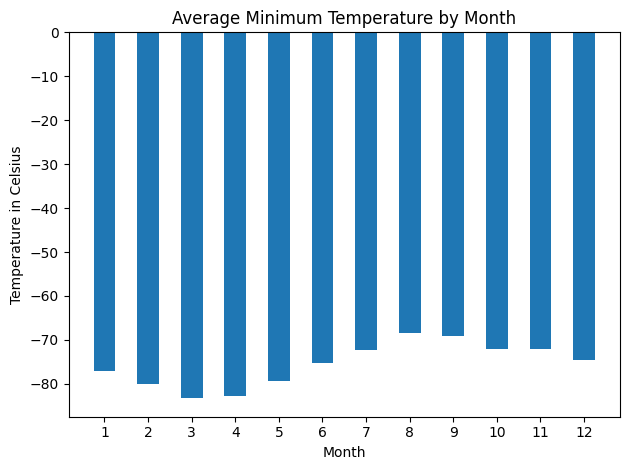

In [16]:
# Plot the average minimum temperature by month
plt.bar(min_temp_by_month.index, min_temp_by_month.values, width=0.5)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.xticks(min_temp_by_month.index)
plt.ylabel('Temperature in Celsius')
plt.tight_layout()
plt.show()

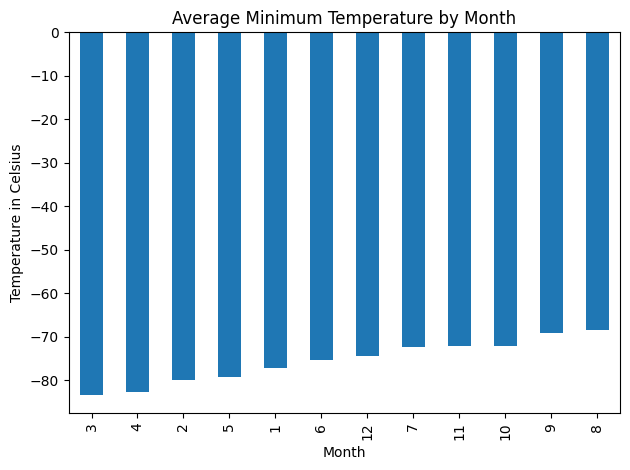

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
min_temp_by_month.sort_values().plot.bar(width=0.5)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.tight_layout()
plt.show()

In [18]:
# 4. What is the average pressure by month?
pressure_by_month = df.groupby('month')['pressure'].mean()
pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

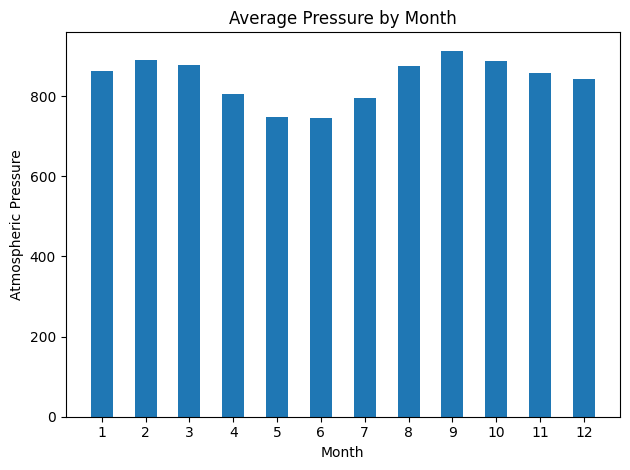

In [19]:
# Plot the average pressure by month
plt.bar(pressure_by_month.index, pressure_by_month.values, width=0.5)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.xticks(pressure_by_month.index)
plt.ylabel('Atmospheric Pressure')
plt.tight_layout()
plt.show()

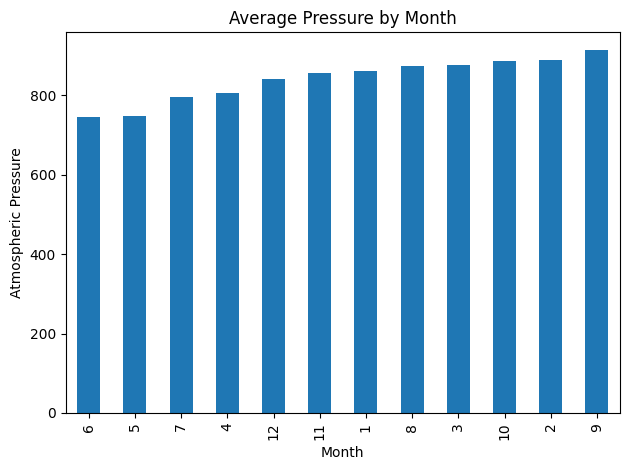

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_by_month.sort_values().plot.bar(width=0.5)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.tight_layout()
plt.show()

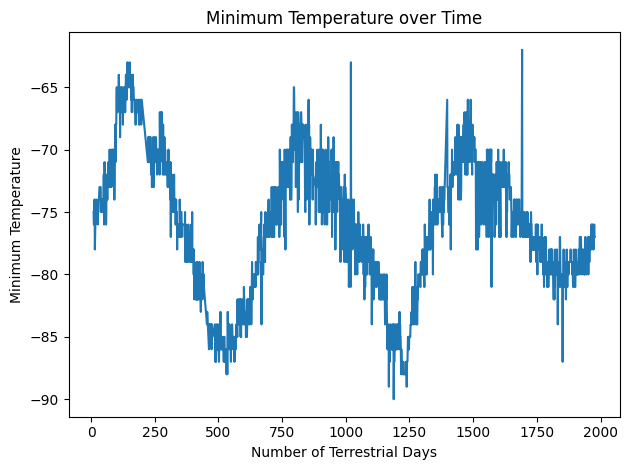

In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(df['sol'], df['min_temp'])
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.tight_layout()
plt.show()

#### Minimum Temperature

* From our data, we can see that month 3 has the lowest minimum temperature at an average of -83.31°C, with month 4 close behind with an average of -82.75°C.
* In contrast, month 8 has the highest minimum temperature at an average of -68.38°C, with month 9 close behind with an average of -69.17°C.
* The average minimum temperature appears to have one peak and one valley over the course of the Martian year.

#### Atmospheric Pressure

* From our data, we can see that month 6 has the lowest atmospheric pressure at an average of 745 Pa, with month 5 close behind with an average of 749 Pa.
* In contrast, month 9 has the highest atmospheric pressure at an average of 913 Pa, with month 2 close behind with an average of 889 Pa.
* Over the course of the Martian year, the average atmospheric pressure appears to have two similar peaks around months 2 and 9, with a deeper valley around months 5 and 6, and a shallower valley around month 12.

#### Year Length

* Looking at the graph's starting point of around -76°C, we can see the cycle of average minimum temperatures beginning to repeat just before the 750 terrestrial days mark, and once more somewhere between the 1250 and 1500 day marks. Estimating the number of terrestrial days in a Martian year just from this graph, I would have to place it roughly around 700 days.
* After making this estimate, I looked up the exact answer: there are 687 terrestrial days in a Martian year. So, this estimate is fairly accurate.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [230]:
# Write the data to a CSV
df.to_csv('mars_temp_data.csv', index=False, header=True)

In [22]:
# Close the browser
browser.quit()